In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 44s 21us/step


In [4]:
train_data.shape

(8982,)

In [5]:
train_labels.shape

(8982,)

In [6]:
test_data.shape

(2246,)

In [7]:
test_labels.shape

(2246,)

In [40]:
maximum = max([max(temp) for temp in train_data])
maximum

9999

In [12]:
import pandas as pd

In [21]:
temp = pd.DataFrame(test_labels, columns = ['labels'])
temp.head()

,labels
0,3
1,10
2,1
3,4
4,4


In [27]:
len(temp.labels.unique())

46

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

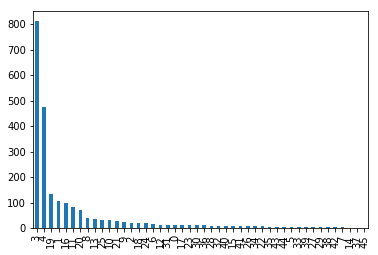

In [32]:
temp.labels.value_counts().plot.bar()
plt.show()

In [33]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [34]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for key, value in word_index.items()])

557056/550378 [==============================] - 6s 10us/step


In [36]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [37]:
train_labels[0]

3

In [38]:
import numpy as np

In [41]:
def vectorize_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences) :
        results[i, sequence] = 1
    return results

In [42]:
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

In [43]:
from keras.utils.np_utils import to_categorical

In [44]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [47]:
from keras.models import Sequential
from keras import layers

In [49]:
model = Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
val_data = train_data[:1000]
val_labels = train_labels[:1000]
partial_train_data = train_data[1000:]
partial_train_labels = train_labels[1000:]

In [56]:
history = model.fit(partial_train_data, partial_train_labels, epochs=10, batch_size=512, validation_data=(val_data, val_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 10s 1ms/step - loss: 2.5843 - accuracy: 0.5309 - val_loss: 1.6990 - val_accuracy: 0.6430
Epoch 2/10
7982/7982 [==============================] - 6s 703us/step - loss: 1.4149 - accuracy: 0.7092 - val_loss: 1.3072 - val_accuracy: 0.7210
Epoch 3/10
7982/7982 [==============================] - 5s 687us/step - loss: 1.0531 - accuracy: 0.7717 - val_loss: 1.1354 - val_accuracy: 0.7430
Epoch 4/10
7982/7982 [==============================] - 6s 779us/step - loss: 0.8278 - accuracy: 0.8280 - val_loss: 1.0456 - val_accuracy: 0.7730
Epoch 5/10
7982/7982 [==============================] - 7s 874us/step - loss: 0.6573 - accuracy: 0.8647 - val_loss: 0.9789 - val_accuracy: 0.7970
Epoch 6/10
7982/7982 [==============================] - 7s 815us/step - loss: 0.5293 - accuracy: 0.8899 - val_loss: 0.9491 - val_accuracy: 0.8060
Epoch 7/10
7982/7982 [==============================] - 8s 948us/step - loss:

In [59]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

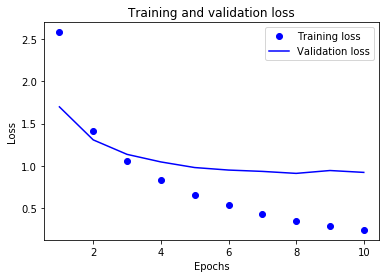

In [62]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

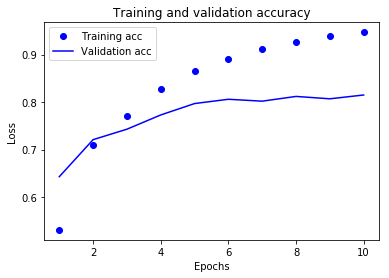

In [64]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_train_data,
partial_train_labels,
epochs=9,
batch_size=512,
validation_data=(val_data, val_labels))
results = model.evaluate(test_data, test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 9s 1ms/step - loss: 2.7059 - accuracy: 0.4699 - val_loss: 1.7853 - val_accuracy: 0.6340
Epoch 2/9
7982/7982 [==============================] - 6s 730us/step - loss: 1.4870 - accuracy: 0.7030 - val_loss: 1.3303 - val_accuracy: 0.7110
Epoch 3/9
7982/7982 [==============================] - 6s 707us/step - loss: 1.0997 - accuracy: 0.7705 - val_loss: 1.1524 - val_accuracy: 0.7500
Epoch 4/9
7982/7982 [==============================] - 6s 744us/step - loss: 0.8694 - accuracy: 0.8187 - val_loss: 1.0631 - val_accuracy: 0.7760
Epoch 5/9
7982/7982 [==============================] - 5s 678us/step - loss: 0.6933 - accuracy: 0.8544 - val_loss: 0.9766 - val_accuracy: 0.8030
Epoch 6/9
7982/7982 [==============================] - 5s 671us/step - loss: 0.5570 - accuracy: 0.8850 - val_loss: 0.9398 - val_accuracy: 0.8000
Epoch 7/9
7982/7982 [==============================] - 6s 706us/step - loss: 0.4439 

In [66]:
results

[1.0339340119094373, 0.7818343639373779]

In [67]:
predictions = model.predict(test_data)

In [68]:
predictions[0].shape

(46,)

In [69]:
np.sum(predictions[0])

1.0

In [70]:
np.argmax(predictions[0])

3